# Mashroom Classification(Day1)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### データ読込

In [3]:
df_data = pd.read_csv("./mushrooms.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


### 欠損値チェック

In [4]:
df_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

⇒欠損値なし

### グラフ化

cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,404,0,1596,228,32,1948,4208
p,48,4,1556,600,0,1708,3916
All,452,4,3152,828,32,3656,8124


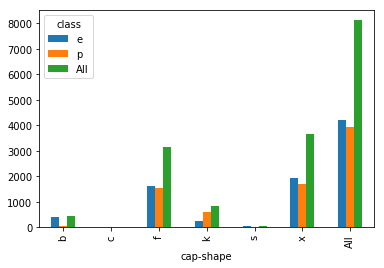

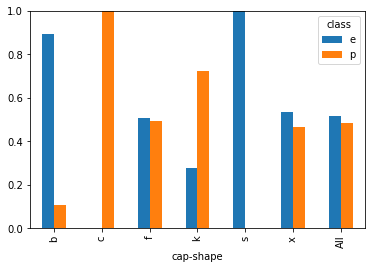

説明変数の候補
b
c
s


cap-surface,f,g,s,y,All
class,,,,,
e,1560,0,1144,1504,4208
p,760,4,1412,1740,3916
All,2320,4,2556,3244,8124


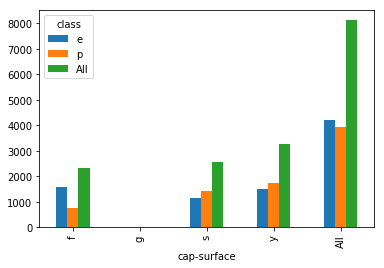

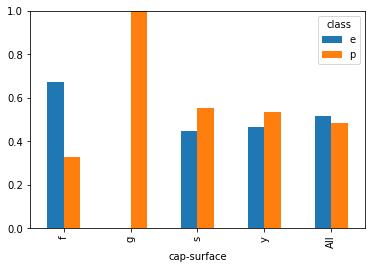

説明変数の候補
g


cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400,4208
p,120,12,876,808,1020,88,0,0,320,672,3916
All,168,44,1500,1840,2284,144,16,16,1040,1072,8124


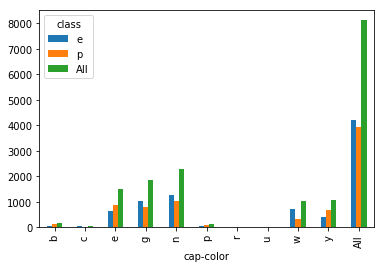

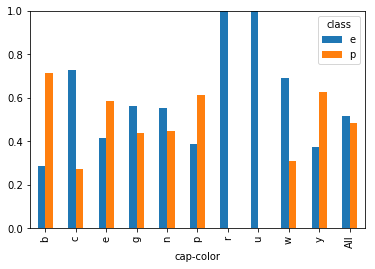

説明変数の候補
r
u


bruises,f,t,All
class,,,
e,1456,2752,4208
p,3292,624,3916
All,4748,3376,8124


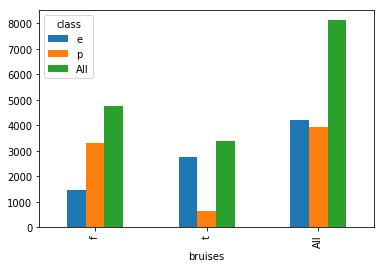

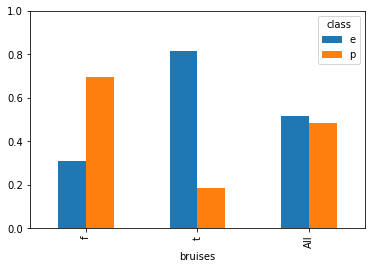

説明変数の候補
t


odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0,4208
p,0,192,2160,0,36,120,256,576,576,3916
All,400,192,2160,400,36,3528,256,576,576,8124


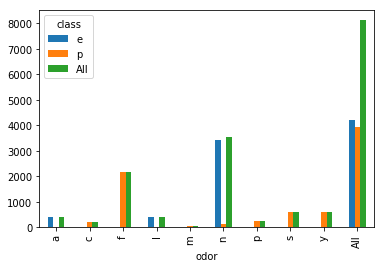

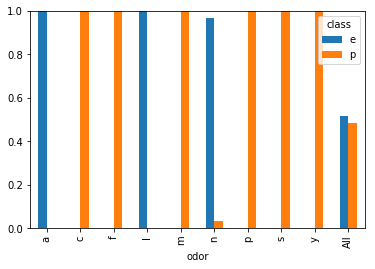

説明変数の候補
a
c
f
l
m
n
p
s
y


gill-attachment,a,f,All
class,,,
e,192,4016,4208
p,18,3898,3916
All,210,7914,8124


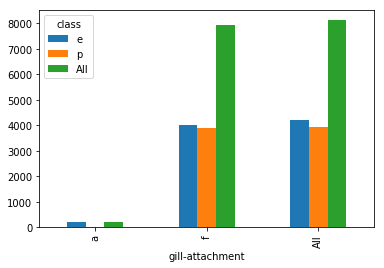

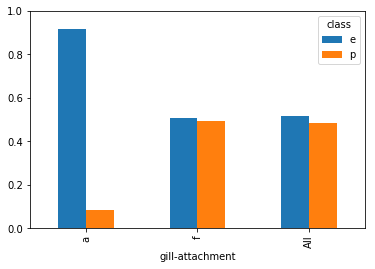

説明変数の候補
a


gill-spacing,c,w,All
class,,,
e,3008,1200,4208
p,3804,112,3916
All,6812,1312,8124


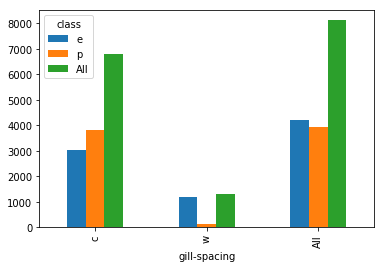

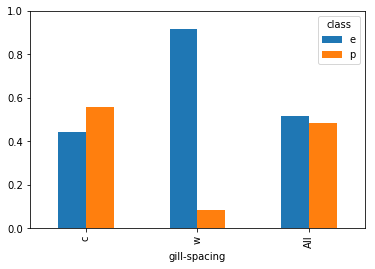

説明変数の候補
w


gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


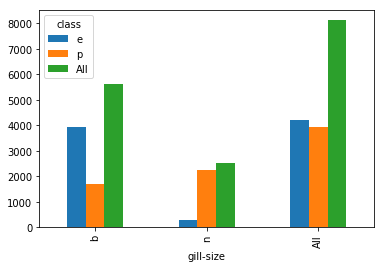

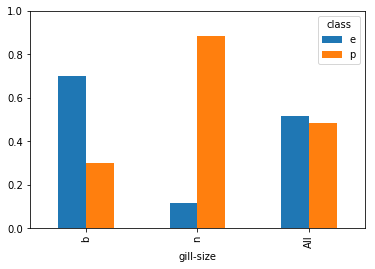

説明変数の候補
n


gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64,4208
p,1728,0,504,528,64,112,0,640,24,48,246,22,3916
All,1728,96,752,732,408,1048,64,1492,24,492,1202,86,8124


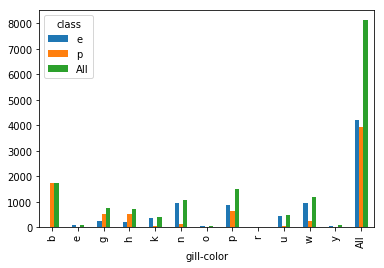

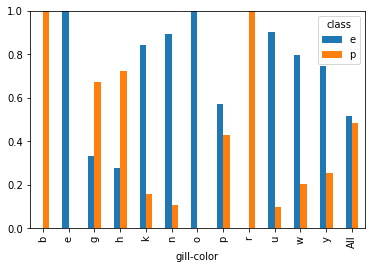

説明変数の候補
b
e
k
n
o
r
u


stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


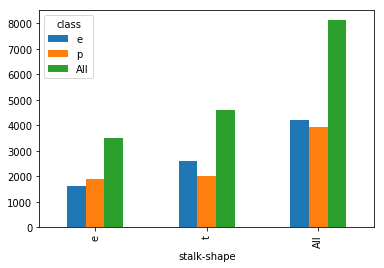

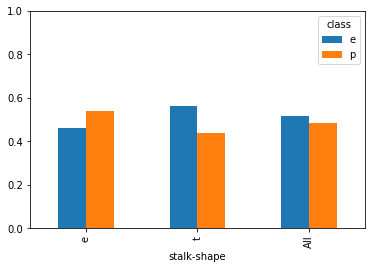

説明変数の候補


stalk-root,?,b,c,e,r,All
class,,,,,,
e,720,1920,512,864,192,4208
p,1760,1856,44,256,0,3916
All,2480,3776,556,1120,192,8124


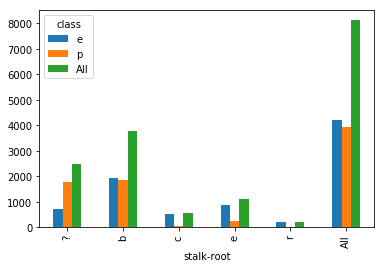

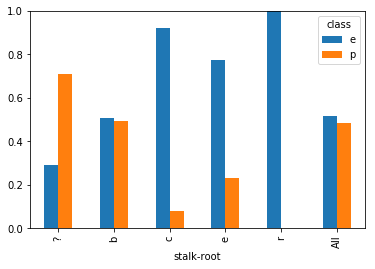

説明変数の候補
c
r


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


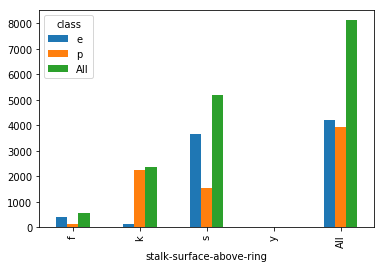

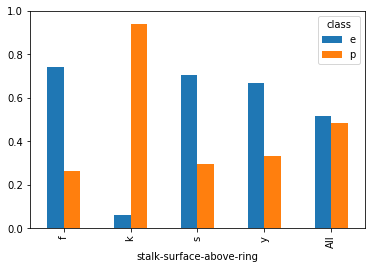

説明変数の候補
k


stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,456,144,3400,208,4208
p,144,2160,1536,76,3916
All,600,2304,4936,284,8124


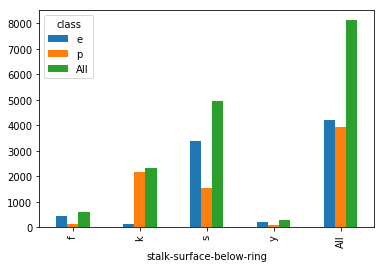

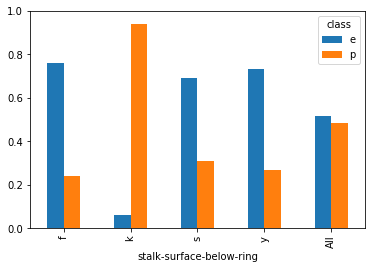

説明変数の候補
k


stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0,4208
p,432,36,0,0,432,0,1296,1712,8,3916
All,432,36,96,576,448,192,1872,4464,8,8124


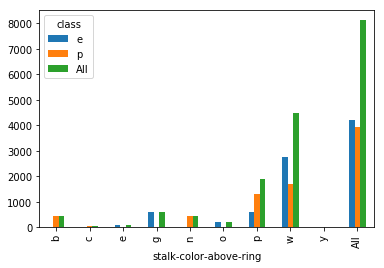

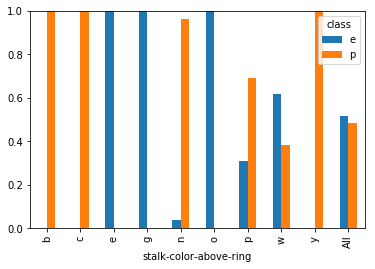

説明変数の候補
b
c
e
g
n
o
y


stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0,4208
p,432,36,0,0,448,0,1296,1680,24,3916
All,432,36,96,576,512,192,1872,4384,24,8124


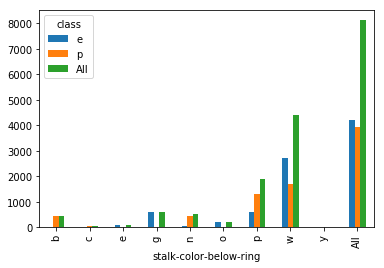

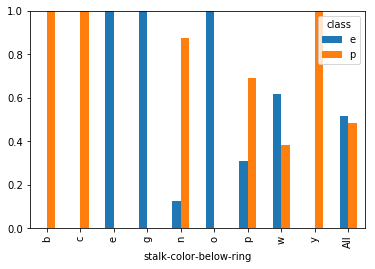

説明変数の候補
b
c
e
g
n
o
y


veil-type,p,All
class,,
e,4208,4208
p,3916,3916
All,8124,8124


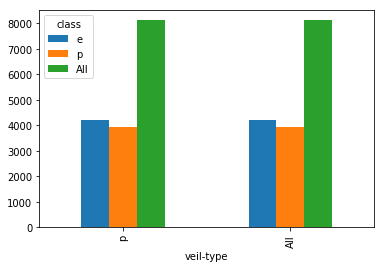

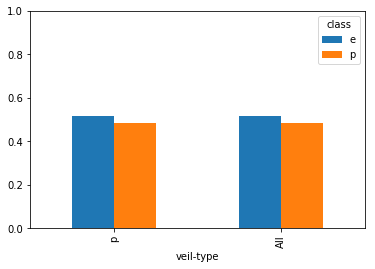

説明変数の候補


veil-color,n,o,w,y,All
class,,,,,
e,96,96,4016,0,4208
p,0,0,3908,8,3916
All,96,96,7924,8,8124


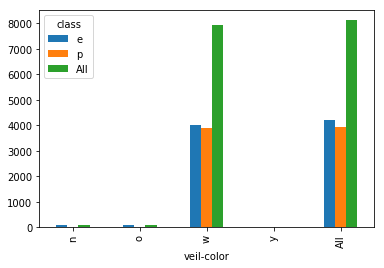

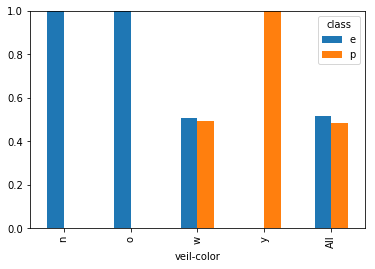

説明変数の候補
n
o
y


ring-number,n,o,t,All
class,,,,
e,0,3680,528,4208
p,36,3808,72,3916
All,36,7488,600,8124


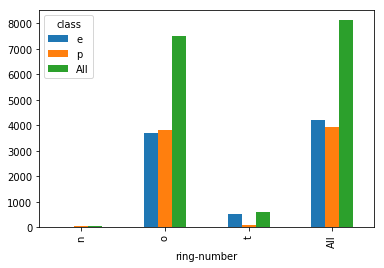

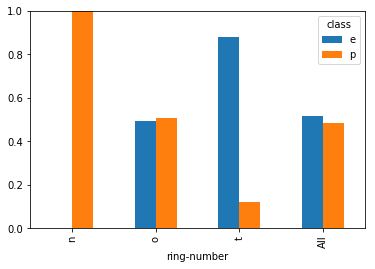

説明変数の候補
n
t


ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


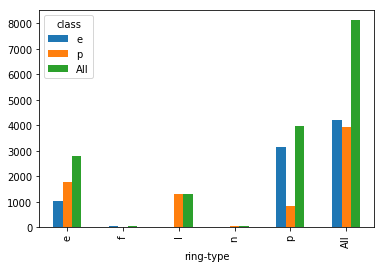

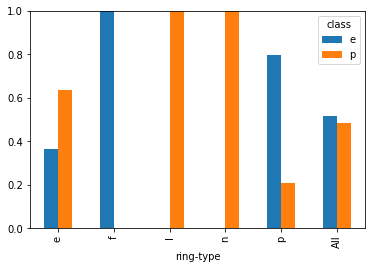

説明変数の候補
f
l
n


spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48,4208
p,0,1584,224,224,0,72,0,1812,0,3916
All,48,1632,1872,1968,48,72,48,2388,48,8124


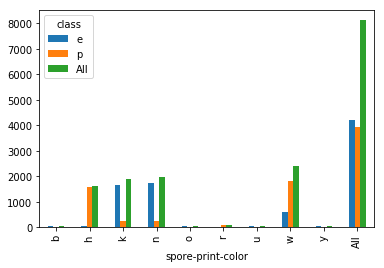

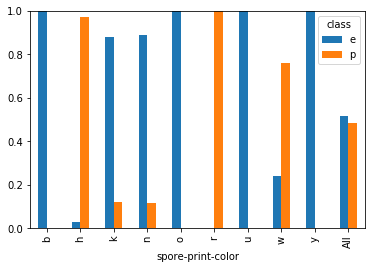

説明変数の候補
b
h
k
n
o
r
u
y


population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


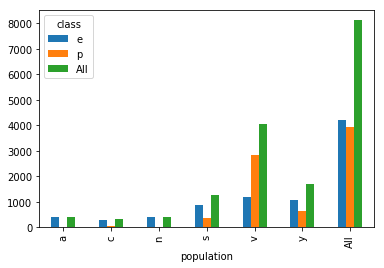

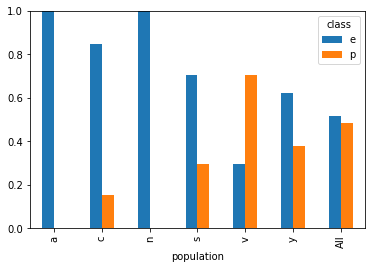

説明変数の候補
a
c
n


habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


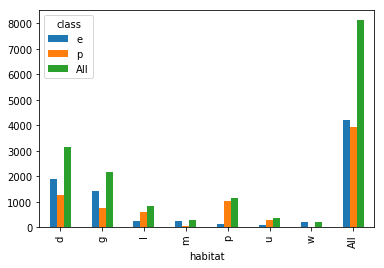

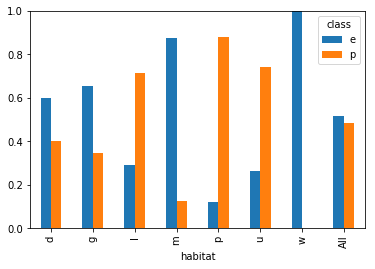

説明変数の候補
m
p
w


In [5]:
for c in df_data.columns:
    if(c != 'class'):
        #データをクロス集計
        df_cross = pd.crosstab(df_data['class'],df_data[c], margins=True)
        display(df_cross)
        #データを正規化('class'が'e'と'p'に極端に分かれている変数を見つけるため。)
        df_cross_norm = pd.crosstab(df_data['class'],df_data[c], margins=True, normalize='columns')
        #データをグラフ化
        df_cross.T.plot(kind='bar')
        df_cross_norm.T.plot(kind='bar')
        plt.ylim([0,1])
        plt.show()
        #'class'が'e'または'p'に80%以上偏っている変数を説明変数の候補として列挙(80%は仮の値)
        print("説明変数の候補")
        for d in df_cross_norm.columns:
            if(d != 'All'):
                if(df_cross_norm[d].e > 0.8 or df_cross_norm[d].p > 0.8):
                    print(d)

### ダミー変数に変換

In [6]:
df_data = pd.get_dummies(df_data)
display(df_data)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [7]:
#相関行列
df_data.corr().style.background_gradient().format('{:.2f}')

C:\Users\yn5349.ITEC\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


veil-type_pに関する相関係数が "nan" になっている ⇒ veil-typeは値がpしか存在しないためclassの決定に寄与しない

### ロジスティック回帰

In [8]:
max_row = len(df_data)
#80%のデータを学習に使用
separate = int(max_row * 4 / 5)
y = df_data['class_e'].iloc[0:separate].values
#classに偏りがある変数のみ説明変数として採用
X = df_data.loc[:,['cap-shape_b','cap-shape_c','cap-shape_s','cap-surface_g','cap-color_r','cap-color_u','bruises_t',
                   'odor_a','odor_l','odor_c','odor_y','odor_f','odor_m','odor_n','odor_p','odor_s',
                   'gill-attachment_a','gill-spacing_w','gill-size_n',
                   'gill-color_k','gill-color_n','gill-color_b','gill-color_r','gill-color_o','gill-color_u','gill-color_e',
                   'stalk-root_c','stalk-root_r','stalk-surface-above-ring_k','stalk-surface-below-ring_k',
                   'stalk-color-above-ring_n','stalk-color-above-ring_b','stalk-color-above-ring_c','stalk-color-above-ring_g',
                   'stalk-color-above-ring_o','stalk-color-above-ring_e','stalk-color-above-ring_y',
                   'stalk-color-below-ring_n','stalk-color-below-ring_b','stalk-color-below-ring_c','stalk-color-below-ring_g',
                   'stalk-color-below-ring_o','stalk-color-below-ring_e','stalk-color-below-ring_y',
                   'veil-color_n','veil-color_o','veil-color_y','ring-number_n','ring-number_t',
                   'ring-type_f','ring-type_l','ring-type_n','spore-print-color_k','spore-print-color_n','spore-print-color_b',
                   'spore-print-color_h','spore-print-color_r','spore-print-color_o','spore-print-color_u','spore-print-color_y',
                   'population_a','population_c','population_n','habitat_m','habitat_p','habitat_w']]
X_train = X.iloc[0:separate,:]

display(X_train)

lr = LogisticRegression()

#学習
lr.fit(X_train,y)
print(lr.coef_,lr.intercept_)

#検証
X_pred = X.iloc[separate + 1:max_row,:]
y = df_data['class_e'].iloc[separate + 1:max_row].values
y_pred = lr.predict(X_pred)
print(classification_report(y,y_pred))

,cap-shape_b,cap-shape_c,cap-shape_s,cap-surface_g,cap-color_r,cap-color_u,bruises_t,odor_a,odor_l,odor_c,...,spore-print-color_r,spore-print-color_o,spore-print-color_u,spore-print-color_y,population_a,population_c,population_n,habitat_m,habitat_p,habitat_w
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
7,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


[[-0.83921665 -0.72169681  0.59886089 -1.19157982  0.60455782  0.60455782
  -0.67051056  3.23356337  3.23356337 -3.97590827 -0.58177665 -3.06065269
  -0.05361371  4.34453666 -2.87233225 -0.54796992  0.07369817  1.57350645
  -3.04148848  0.28014056  0.48716529 -1.18399443 -0.83233399  0.03018073
   0.2720458   0.73199256  1.61749838  0.84532585 -2.76272134 -0.37751982
  -0.16224775 -0.16224775 -0.05361371  0.73893184  0.07369817  0.73199256
   0.          0.18281477 -0.14538643 -0.05361371  0.73893184  0.07369817
   0.73199256 -0.90939611  0.04491492  0.02878324  0.         -0.05361371
  -0.84969962  2.27783575 -0.51863035 -0.05361371  2.06354699  2.27128045
   0.         -0.72856908 -4.4484366   0.03671374  2.12134498  0.02522761
   0.11991048 -1.24207859  0.81718084 -0.57904944 -0.01093676  2.23364661]] [-0.28059009]
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      1117
          1       0.98      1.00      0.99       507

avg / tot

⇒説明変数を減らす